In [10]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [11]:
class LoanState(TypedDict):
    name: str
    amount_requested: float
    credit_score: int
    eligibility: Literal["APPROVED", "REJECTED"]
    interest_rate: float
    total_payable: float

In [22]:
def check_eligibility_and_mark(state: LoanState) -> LoanState:
    if state["credit_score"] < 600:
        state["eligibility"] = "REJECTED"
    else:
        state["eligibility"] = "APPROVED"
    return state

In [23]:
def route_by_eligibility(state: LoanState) -> str:
    """Returns a routing string based on eligibility for conditional branching."""
    return state["eligibility"]

In [14]:
def caculate_interest(state: LoanState) -> LoanState:
    if state["credit_score"] >= 750:
        state["interest_rate"] = 0.05
    else:
        state["interest_rate"] = 0.1
    return state

In [15]:
def calculate_total_payable(state: LoanState) -> LoanState:
    state["total_payable"] = state["amount_requested"] * (1 + state["interest_rate"])
    return state

In [16]:
def reject_application(state: LoanState) -> LoanState:
    state["eligibility"] = "REJECTED"
    state["interest_rate"] = 0.0
    state["total_payable"] = 0.0
    return state

In [24]:
builder = StateGraph(LoanState)
builder.add_node("check_eligibility_and_mark", check_eligibility_and_mark)
builder.add_node("compute_interest", caculate_interest)
builder.add_node("calculate_total_payable", calculate_total_payable)
builder.add_node("reject_application", reject_application)
builder.add_edge(START, "check_eligibility_and_mark")
builder.add_conditional_edges(
    "check_eligibility_and_mark",
    route_by_eligibility,
    {
        "APPROVED": "compute_interest",
        "REJECTED": "reject_application"
    })
builder.add_edge("compute_interest", "calculate_total_payable")
builder.add_edge(["calculate_total_payable", "reject_application"], END)



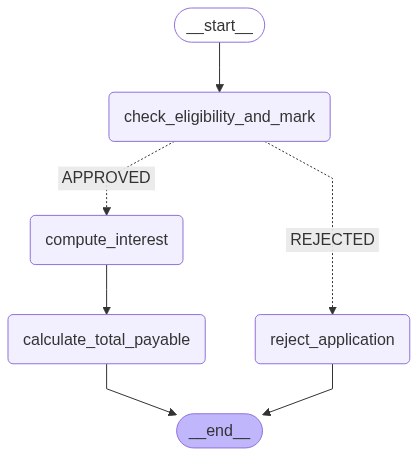


✅ Approved Applicant:
{'name': 'Alice', 'amount_requested': 100000, 'credit_score': 720, 'eligibility': 'APPROVED', 'interest_rate': 0.1, 'total_payable': 110000.00000000001}

❌ Rejected Applicant:
{'name': 'Bob', 'amount_requested': 100000, 'credit_score': 600, 'eligibility': 'APPROVED', 'interest_rate': 0.1, 'total_payable': 110000.00000000001}


In [ ]:
# Step 4: Compile and visualize
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

# Step 5: Run examples
print("\n Approved Applicant:")
result1 = graph.invoke({
    "name": "Alice",
    "amount_requested": 100000,
    "credit_score": 720
})
print(result1)

print("\n Rejected Applicant:")
result2 = graph.invoke({
    "name": "Bob",
    "amount_requested": 100000,
    "credit_score": 600
})
print(result2)